- ## 평균
    - ### 모집단의 형태가 한 방향으로 명확하게 치우쳐져 있어도, 샘플에서는 정규 분포의 형태에 가깝게 나타남

<br>

- ### 값의 분포가 동일하면 평균도 동일함
    - ### 평균 = 평형을 이루는 지점(무게 중심)

In [2]:
import numpy as np
from datascience import *
%matplotlib inline

np.mean(make_array(2, 3, 3, 9)), np.mean(make_array(2, 2, 3, 3, 3, 3, 9, 9))

(4.25, 4.25)

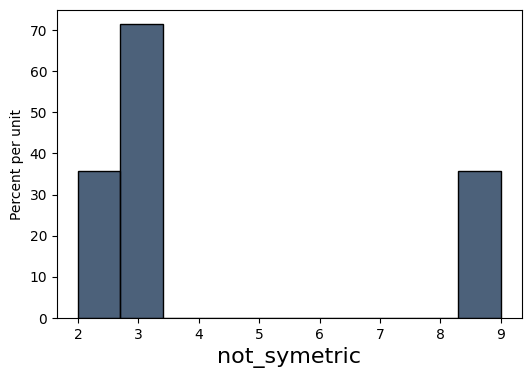

In [7]:
Table().with_column("not_symetric", make_array(2, 3, 3, 9)).hist()

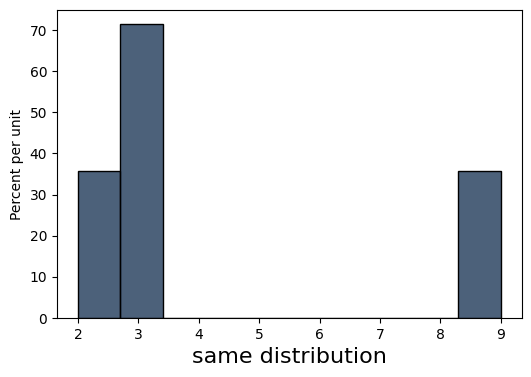

In [8]:
Table().with_column("same distribution", make_array(2, 2, 3, 3, 3, 3, 9, 9)).hist()

In [10]:
np.median(make_array(2, 3, 3, 9)), percentile(50, make_array(2, 3, 3, 9))

(3.0, 3)

<br>

- ### 대칭 분포
    - ### 평균과 중앙값 동일

In [14]:
np.mean(make_array(2, 3, 3, 4)), np.median(make_array(2, 3, 3, 4))

(3.0, 3.0)

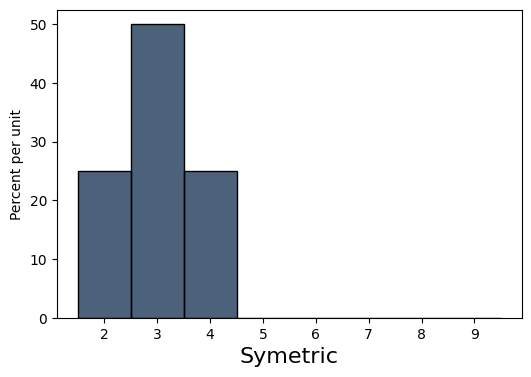

In [12]:
symetric = Table().with_column("Symetric", make_array(2, 3, 3, 4))
symetric.hist(bins=np.arange(1.5, 10.5, 1))

<br>

- ## 표준편차 (Standard Deviation)
    - #### 각 항목이 평균과 떨어진 거리의 합
    - #### np.std(array)

- ## 분산
    - #### 평균과 떨어진 거리의 제곱

<br>

In [3]:
nba13 = Table.read_table("./csv/nba2013.csv")
nba13.show(3)

Name,Position,Height,Weight,Age in 2013
DeQuan Jones,Guard,80,221,23
Darius Miller,Guard,80,235,23
Trevor Ariza,Guard,80,210,28


- #### 키에 대한 히스토그램

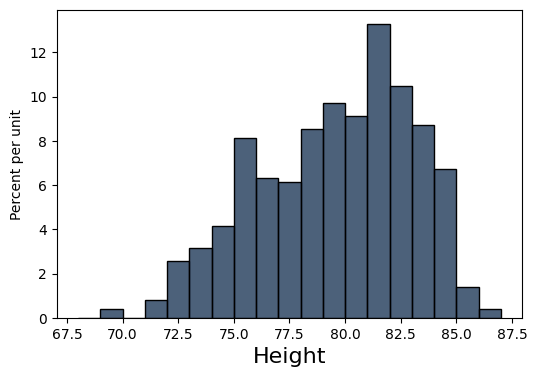

In [5]:
nba13.hist("Height", bins=np.arange(68, 88, 1))

- #### 키의 평균, SD

In [10]:
mean_height, sd_height = np.mean(nba13.column("Height")), np.std(nba13.column("Height"))
mean_height, sd_height

(79.065346534653472, 3.4505971830275546)

- #### 키가 가장 큰 선수와 가장 작은 선수

In [8]:
nba13.sort("Height", descending=True).show(1)

Name,Position,Height,Weight,Age in 2013
Hasheem Thabeet,Center,87,263,26


In [11]:
87 - mean_height

7.9346534653465284

In [9]:
nba13.sort("Height", descending=False).show(1)

Name,Position,Height,Weight,Age in 2013
Isaiah Thomas,Guard,69,185,24


In [12]:
69 - mean_height

-10.065346534653472

<br>

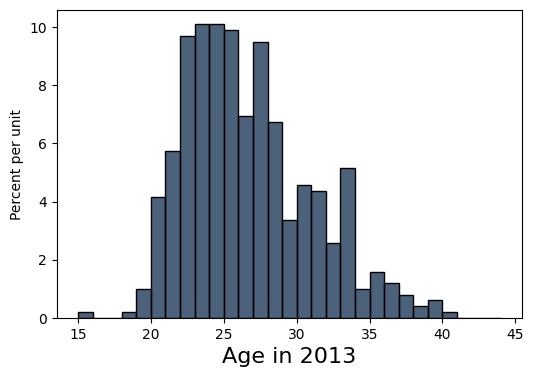

In [14]:
nba13.select("Age in 2013").hist(bins=np.arange(15, 45, 1))

In [18]:
ages = nba13.select("Age in 2013").column(0)

mean_age = np.mean(ages)
sd_age = np.std(ages)

mean_age, sd_age

(26.19009900990099, 4.3212004417203067)

- #### 최대, 최소 나이의 SD와의 배율

In [19]:
(np.max(ages) - mean_age) / sd_age

3.1958482778922357

In [20]:
(np.min(ages) - mean_age) / sd_age

-2.5895811038670811

- #### 대부분의 항목은 평균에서 2~3SD 이상 차이가 나지 않음

---

- ## Chebychevs's Bounds
    - #### 어떠한 분포가 있을 때 오른쪽으로는 제한이 없지만, 최소값에 대한 제한은 경계를 넘어서지 않음
 
    <br>
 
    - ### $ average \pm z SD $
        - ### 최소 1 - $\frac{1}{z^2}$ %의 항목들이 $\pm$z SD 내 분포
     
    <br>

    - ### $z$
        - ### 표준 단위
        - ### $ z = \frac{value-average}{SD} $

<br>

In [21]:
united = Table.read_table("./csv/united_summer2015.csv")
united.show(3)

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3


- #### Standard Units 열 추가

In [25]:
def standard_units(numbers_array):
    return (numbers_array - np.mean(numbers_array)) / np.std(numbers_array)

united = united.with_column("Delay (Standard Units)", standard_units(united.column("Delay")))
united.show(3)

Date,Flight Number,Destination,Delay,Delay (Standard Units)
6/1/15,73,HNL,257,6.08766
6/1/15,217,EWR,28,0.287279
6/1/15,237,STL,-3,-0.497924


- #### 최대 Standard Unit

In [27]:
united.sort("Delay (Standard Units)", descending=True).show(1)

Date,Flight Number,Destination,Delay,Delay (Standard Units)
6/21/15,1964,SEA,580,14.269


- #### 최소 Standard Unit

In [28]:
united.sort("Delay (Standard Units)", descending=False).show(1)

Date,Flight Number,Destination,Delay,Delay (Standard Units)
6/6/15,525,IAD,-16,-0.827203


<br>

- #### $\pm$ 3SD 내 분포하는 값들의 비율

In [30]:
united.where("Delay (Standard Units)", are.between(-3, 3)).num_rows / united.num_rows

0.9790235081374322

- #### $average \pm 3SD $ 만족
    - #### 최소 89% 이상만 존재하면 됨

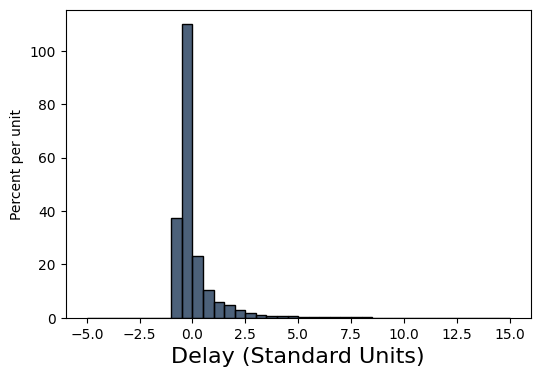

In [31]:
united.hist("Delay (Standard Units)", bins=np.arange(-5, 15.5, 0.5))

---

- ## 정규 곡선
    - #### 기울기가 갑자기 바뀌는 변곡점이 존재
    - #### 변곡점 위치가 SD(표준편차)
    - #### 표준 정규 곡선
        - #### 평균 0, 표준편차 1

- ### 수식 대체 정규분포 함수
    - ### scipy.stats.norm.pdf(z)

In [2]:
#!pip install scipy

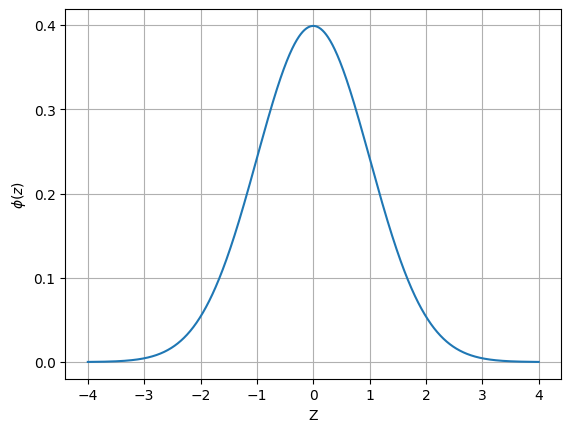

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

z = np.linspace(-4, 4, 1000)
#y = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * (z ** 2))
y = stats.norm.pdf(z)

plt.plot(z, y)
plt.xlabel('Z')
plt.ylabel('$\phi(z)$')

y_ticks = np.arange(0, max(y) + 0.1, 0.1)
plt.yticks(y_ticks)
plt.grid(True)
plt.show()

- ### 표준 정규분포 z = n까지의 면적
    - ### stats.norm.cdf(n)

In [5]:
stats.norm.cdf(1)

0.8413447460685429

- #### SD=1일때의 면적

In [6]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.6826894921370859

- #### SD=2일때의 면적

In [7]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

0.9544997361036416

- #### SD=3일때의 면적
    - #### 일반적으로 3SD 내에 대부분 분포

In [8]:
stats.norm.cdf(3) - stats.norm.cdf(-3)

0.9973002039367398

---

- ## 중심 극한의 정의
    - ### 중복 허용 샘플의 분포는 정규분포 형태를 따름

In [13]:
from datascience import *
%matplotlib inline

colors = make_array("Purple", "Purple", "Purple", "White")
model = Table().with_column("Color", colors)
model

Color
Purple
Purple
Purple
White


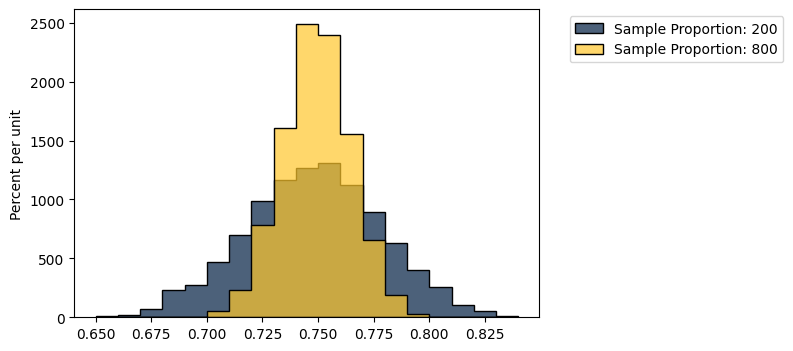

In [18]:
repetitions = 10000

props_200 = make_array()
for _ in range(repetitions):
    sample = model.sample(200)
    new_prop = np.count_nonzero(sample.column("Color") == "Purple") / 200
    props_200 = np.append(props_200, new_prop)

props_800 = make_array()
for _ in range(repetitions):
    sample = model.sample(800)
    new_prop = np.count_nonzero(sample.column("Color") == "Purple") / 800
    props_800 = np.append(props_800, new_prop)

Table().with_columns("Sample Proportion: 200", props_200,
                   "Sample Proportion: 800", props_800).hist(bins=np.arange(0.65, 0.85, 0.01))

- ### Sample Size가 800개인 경우 0.75에 더 촘촘하게 모여 있음

---

In [34]:
united = Table.read_table("./csv/united_summer2015.csv")
delay = united.select("Delay")
delay_mean = np.mean(delay.column(0))
delay_mean

16.658155515370705

In [41]:
def simulate_sample_mean(table, label, sample_size, repetitions):
    means = make_array()
    for _ in range(repetitions):
        sample = table.sample(sample_size).column(label)
        means = np.append(means, np.mean(sample))
    sample_means = Table().with_column("Sample Means", means)
    print("mean: ", np.mean(means))
    print("SD: ", np.std(means))
    
    sample_means.hist(bins=20)

- #### Sample 100개의 지연 평균

mean:  16.71985
SD:  3.97444375951


(0.0, 0.25)

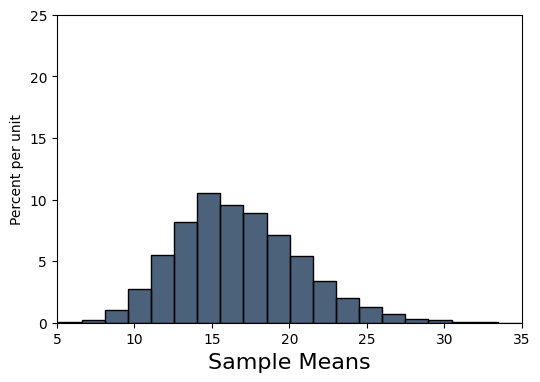

In [42]:
simulate_sample_mean(delay, "Delay", 100, 10000)
plt.xlim(5, 35)
plt.ylim(0, 0.25)

- #### Sample 400개의 지연 평균

mean:  16.65412525
SD:  1.95924725257


(0.0, 0.25)

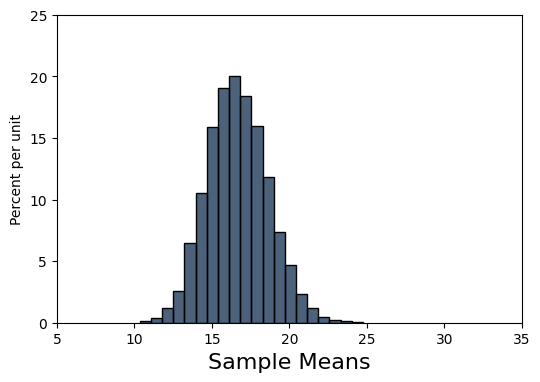

In [43]:
simulate_sample_mean(delay, "Delay", 400, 10000)
plt.xlim(5, 35)
plt.ylim(0, 0.25)

- #### Sample 625개의 지연 평균

mean:  16.65878048
SD:  1.61176848652


(0.0, 0.25)

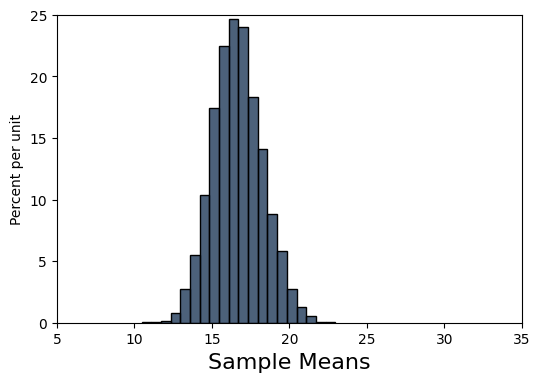

In [44]:
simulate_sample_mean(delay, "Delay", 625, 10000)
plt.xlim(5, 35)
plt.ylim(0, 0.25)

- ### Sample Size 커질수록 SD 줄어듬, 평균 모집단에 가까워짐
    - #### 신뢰구간을 높게 가져가고 싶으면 샘플을 많이 사용
    - #### 샘플 많이 사용 시 비용 많이 듬
    - #### 샘플이 계속 늘어난다해도 SD가 계속 감소하지는 않음

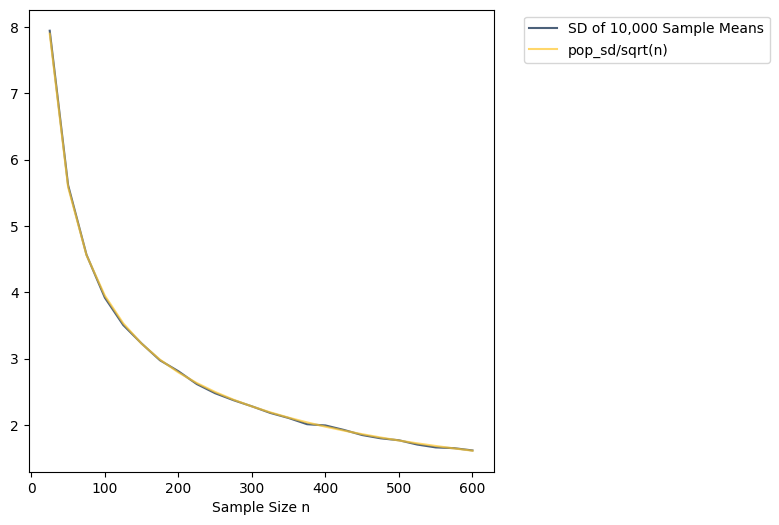

In [46]:
repetitions = 10000
sample_sizes = np.arange(25, 625, 25)

sd_means = make_array()

for n in sample_sizes:
    means = make_array()
    for i in np.arange(repetitions):
        means = np.append(means, np.mean(delay.sample(n).column("Delay")))
    sd_means = np.append(sd_means, np.std(means))

sd_comparison = Table().with_columns(
    "Sample Size n", sample_sizes,
    "SD of 10,000 Sample Means", sd_means,
    "pop_sd/sqrt(n)", np.std(delay.column(0)) / np.sqrt(sample_sizes)
)
sd_comparison.plot("Sample Size n")

<br>